In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_url="./Study_vs_Score_data.csv"
df = pd.read_csv(data_url)
df.head()

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Attendance_Hours']], df['Final_Marks'], test_size=0.2, random_state=42)

In [6]:
X_train.head()

,Attendance_Hours
29,13.251529
535,76.133601
695,52.743403
557,12.014787
836,74.039213


In [7]:
y_train.head()

29     42.152728
535    71.507619
695    69.613104
557    44.495045
836    78.513371
Name: Final_Marks, dtype: float64

In [8]:
def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def ridge_regression(X, y, penalty=1.00, epochs=1000, learning_rate=0.01):
    n, m = X.shape
    w = np.zeros(m)
    loss_history = []

    for epoch in range(epochs):
        y_pred = X.dot(w)
        loss = loss_function(y, y_pred)
        gradient = -2 * X.T.dot(y - y_pred) / n + penalty * np.sign(w)
        w -= learning_rate * gradient
        loss_history.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return w, loss_history


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_with_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
w, loss_history = ridge_regression(X_train_with_bias, y_train.values, penalty=0.00001, epochs=1000000, learning_rate=0.00001)


Epoch 0, Loss: 4074.871003109034
Epoch 100, Loss: 317.8295008068219
Epoch 200, Loss: 317.43883402986734
Epoch 300, Loss: 317.23585149230445
Epoch 400, Loss: 317.03301924934243
Epoch 500, Loss: 316.83032784026705
Epoch 600, Loss: 316.6277771668208
Epoch 700, Loss: 316.42536713128607
Epoch 800, Loss: 316.2230976360131
Epoch 900, Loss: 316.0209685834201
Epoch 1000, Loss: 315.8189798759927
Epoch 1100, Loss: 315.61713141628434
Epoch 1200, Loss: 315.4154231069164
Epoch 1300, Loss: 315.2138548505774
Epoch 1400, Loss: 315.0124265500238
Epoch 1500, Loss: 314.8111381080795
Epoch 1600, Loss: 314.60998942763575
Epoch 1700, Loss: 314.40898041165144
Epoch 1800, Loss: 314.2081109631526
Epoch 1900, Loss: 314.00738098523254
Epoch 2000, Loss: 313.8067903810524
Epoch 2100, Loss: 313.6063390538399
Epoch 2200, Loss: 313.40602690689025
Epoch 2300, Loss: 313.2058538435659
Epoch 2400, Loss: 313.00581976729615
Epoch 2500, Loss: 312.8059245815774
Epoch 2600, Loss: 312.60616818997346
Epoch 2700, Loss: 312.406550

Epoch 5300, Loss: 307.2648592413887
Epoch 5400, Loss: 307.06895020235527
Epoch 5500, Loss: 306.8731771897168
Epoch 5600, Loss: 306.6775401090258
Epoch 5700, Loss: 306.4820388658998
Epoch 5800, Loss: 306.2866733660222
Epoch 5900, Loss: 306.09144351514175
Epoch 6000, Loss: 305.8963492190727
Epoch 6100, Loss: 305.7013903836945
Epoch 6200, Loss: 305.50656691495226
Epoch 6300, Loss: 305.3118787188561
Epoch 6400, Loss: 305.1173257014818
Epoch 6500, Loss: 304.9229077689699
Epoch 6600, Loss: 304.72862482752623
Epoch 6700, Loss: 304.53447678342206
Epoch 6800, Loss: 304.3404635429934
Epoch 6900, Loss: 304.14658501264137
Epoch 7000, Loss: 303.952841098832
Epoch 7100, Loss: 303.75923170809654
Epoch 7200, Loss: 303.56575674703106
Epoch 7300, Loss: 303.3724161222961
Epoch 7400, Loss: 303.17920974061764
Epoch 7500, Loss: 302.9861375087857
Epoch 7600, Loss: 302.7931993336557
Epoch 7700, Loss: 302.6003951221473
Epoch 7800, Loss: 302.40772478124495
Epoch 7900, Loss: 302.21518821799776
Epoch 8000, Loss: 

In [ ]:
print("Weights:", w)

Weights: [39.79915688  0.51103502]


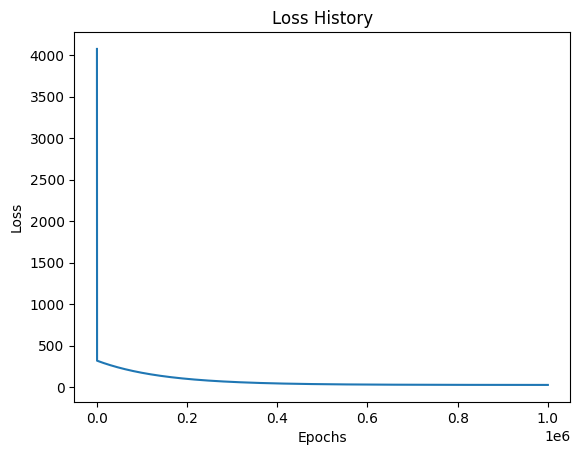

In [ ]:
#plot loss history
def plot_loss_history(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

plot_loss_history(loss_history)


In [ ]:
#caculate accuracy
X_test_with_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred = X_test_with_bias.dot(w)

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MSE: 21.53
RMSE: 4.64
R² Score: 0.8226
